# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-datase

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [535]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN,KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [536]:
# df = pd.read_csv('./Dataset_inisiasi.csv')
df = pd.read_csv('https://raw.githubusercontent.com/ftthalmhdi/movies/refs/heads/main/Dataset_inisiasi.csv')
df = df.sample(n=5000,random_state=123)
df.shape

(5000, 21)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

Shape Dataset: (5000, 21)

Data types dataset:
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

Missing Value:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instr

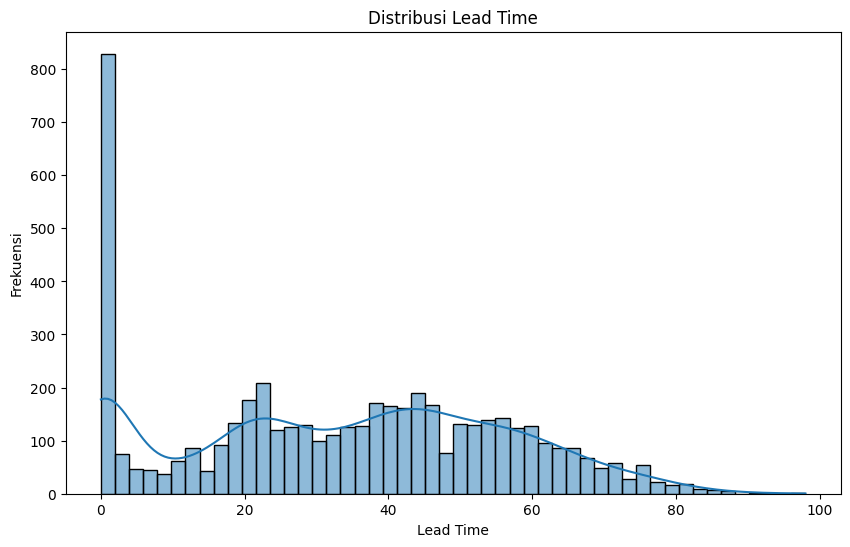

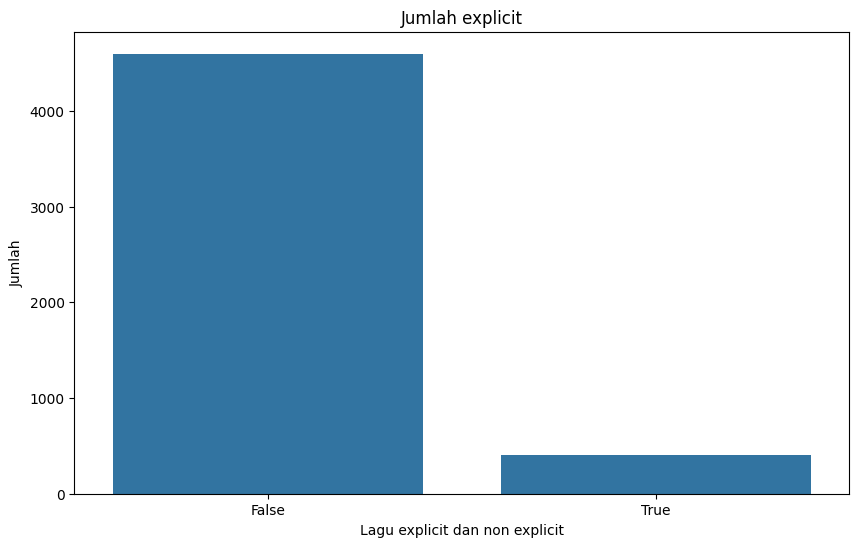

In [537]:
print('Shape Dataset:', df.shape)
print('\nData types dataset:')
print(df.dtypes)
print('\nMissing Value:')
print(df.isnull().sum())
print('\nRingkasan Statistik:')
print(df.describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=50, kde=True)
plt.title('Distribusi Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frekuensi')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='explicit')
plt.title('Jumlah explicit')
plt.xlabel('Lagu explicit dan non explicit')
plt.ylabel('Jumlah')
plt.show()

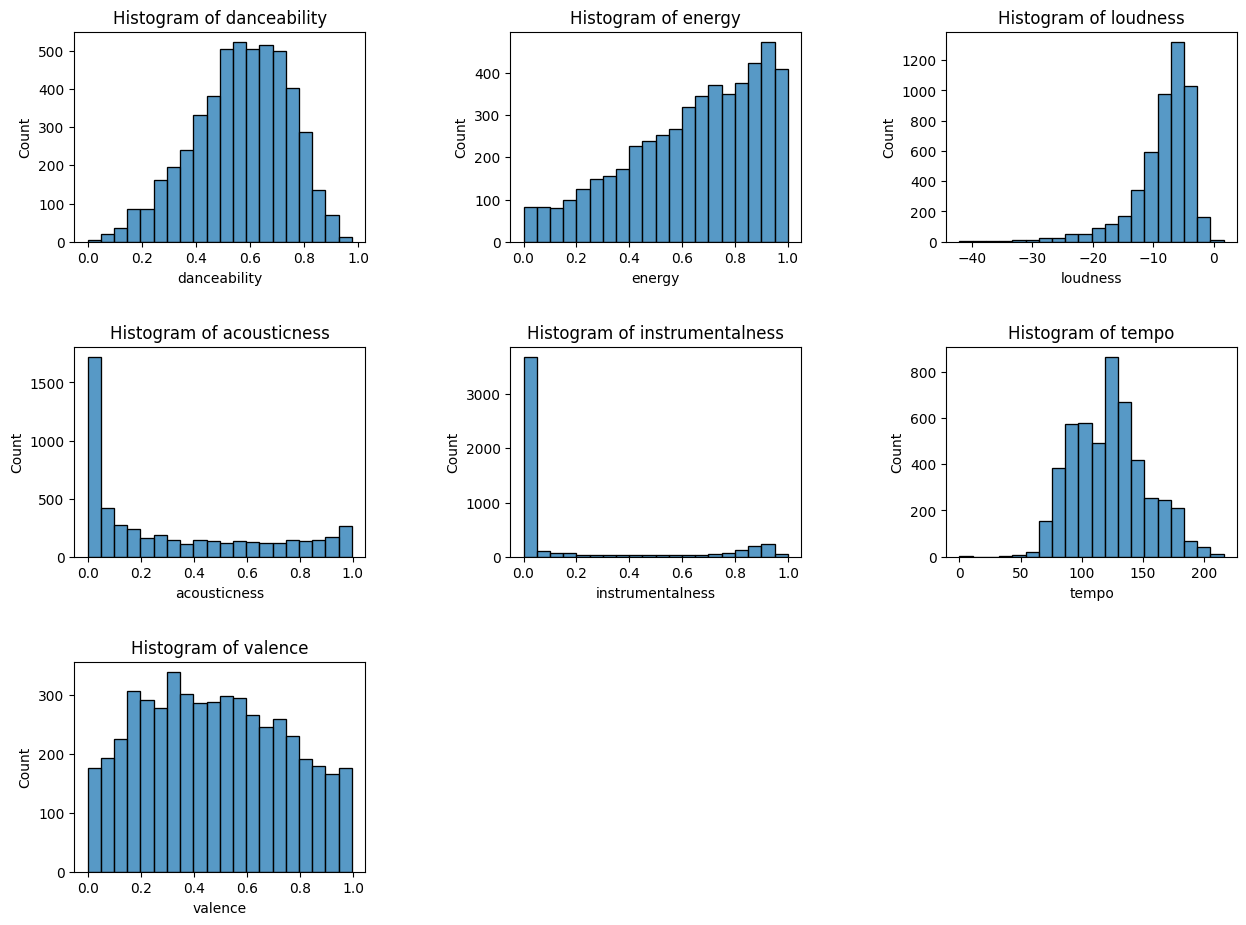

In [538]:
plt.figure(figsize=(15, 15))
n = 0
for x in ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'tempo', 'valence']:
    n += 1
    plt.subplot(4 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 20)
    plt.title('Histogram of {}'.format(x))
plt.show()

In [539]:
numerical_cols = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'tempo', 'valence']
correlation = df[numerical_cols].corr()
print(correlation)

                  danceability    energy  loudness  acousticness  \
danceability          1.000000  0.132033  0.254923     -0.146934   
energy                0.132033  1.000000  0.763135     -0.731039   
loudness              0.254923  0.763135  1.000000     -0.583748   
acousticness         -0.146934 -0.731039 -0.583748      1.000000   
instrumentalness     -0.208630 -0.197545 -0.462977      0.123421   
tempo                -0.056871  0.238612  0.226065     -0.199628   
valence               0.477171  0.276903  0.298972     -0.096734   

                  instrumentalness     tempo   valence  
danceability             -0.208630 -0.056871  0.477171  
energy                   -0.197545  0.238612  0.276903  
loudness                 -0.462977  0.226065  0.298972  
acousticness              0.123421 -0.199628 -0.096734  
instrumentalness          1.000000 -0.069102 -0.349959  
tempo                    -0.069102  1.000000  0.071922  
valence                  -0.349959  0.071922  1.000000  

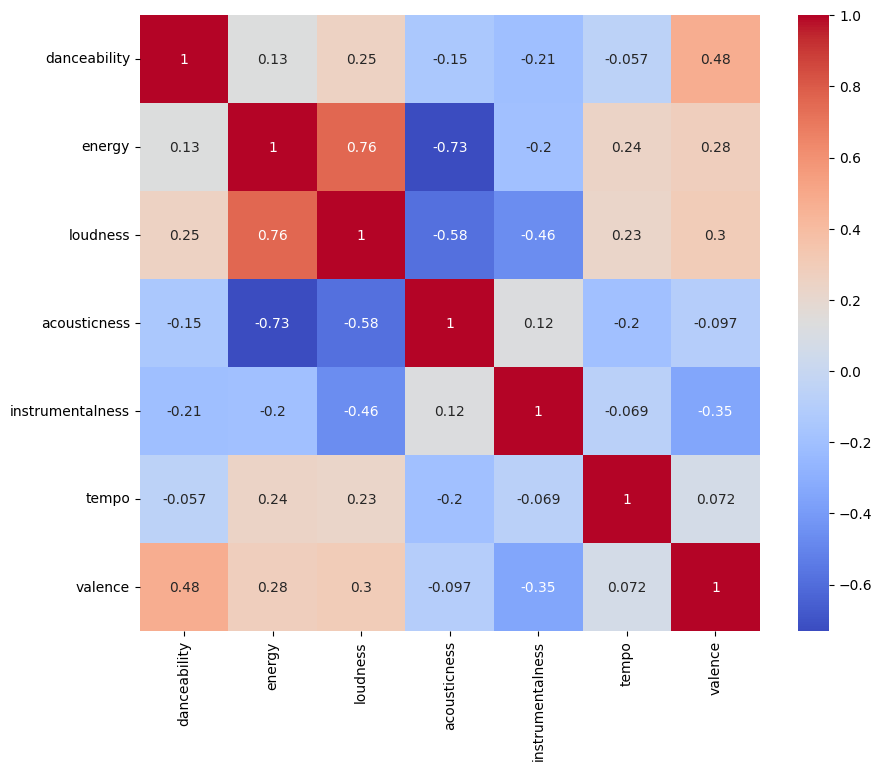

In [540]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [541]:
df.shape
df = df.drop_duplicates()
df.shape

(5000, 21)

In [542]:
df.duplicated().sum()

0

In [543]:
print('\nMissing value before preprocessing:')
print(df.isnull().sum())
df.drop(columns=['Unnamed: 0','track_id', 'artists', 'album_name', 'track_name'], inplace=True)
df.dropna(inplace=True)
print('\nNilai Hilang setelah preprocessing:')
print(df.isnull().sum())
df.shape


Missing value before preprocessing:
Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Nilai Hilang setelah preprocessing:
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


(5000, 16)

Data sebelum outlier dibersihkan (5000, 16)


<Figure size 1500x1000 with 0 Axes>

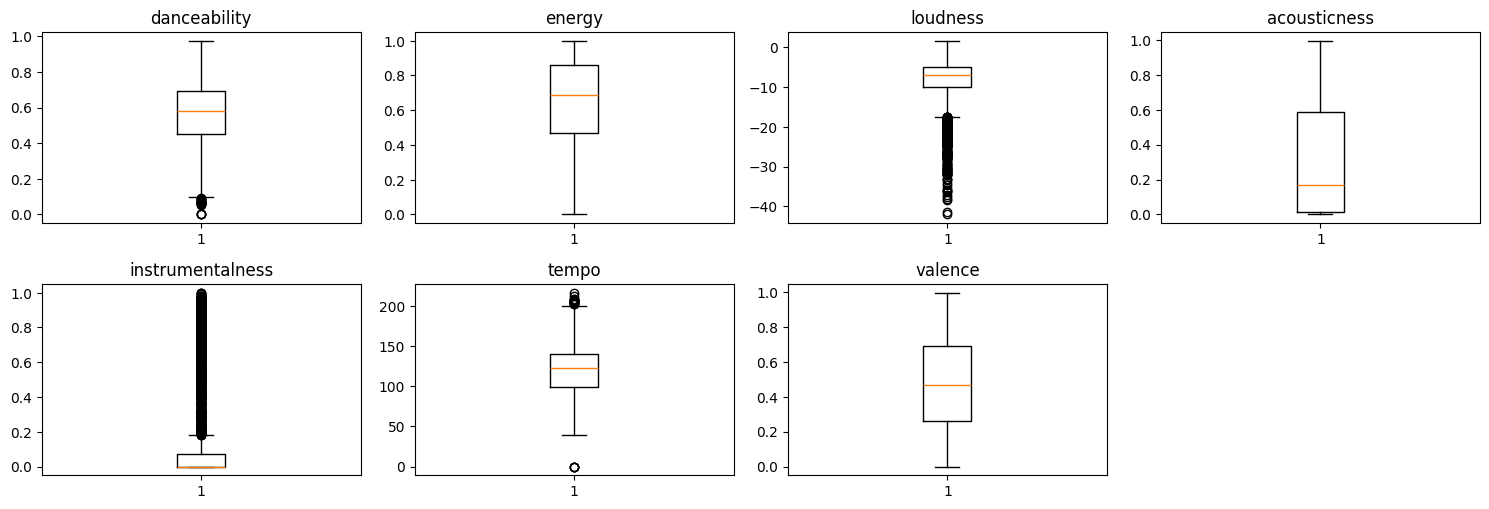

Data setelah Outlier setelah dibersihkan (5000, 16)


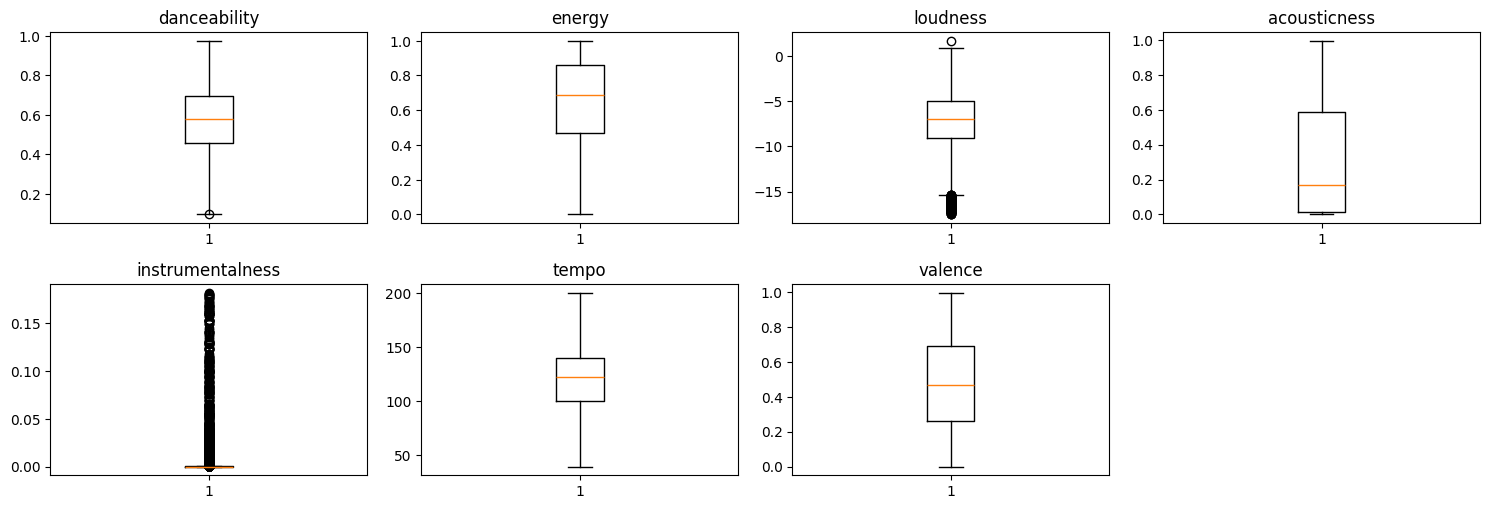

In [544]:
print("Data sebelum outlier dibersihkan", df.shape)
selected_features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'tempo', 'valence']
df_selected_features = df[selected_features].copy()

plt.figure(figsize=(15, 10))
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_features, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(df_selected_features[col])
    plt.title(col)
plt.tight_layout()
plt.show()

for col in selected_features:
    Q1 = df_selected_features[col].quantile(0.25)
    Q3 = df_selected_features[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_selected_features.loc[(df_selected_features[col] < lower_bound) | (df_selected_features[col] > upper_bound), col] = df_selected_features[col].median()

df[selected_features] = df_selected_features[selected_features]

print("Data setelah Outlier setelah dibersihkan", df.shape)
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_features, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(df_selected_features[col])
    plt.title(col)
plt.tight_layout()
plt.show()

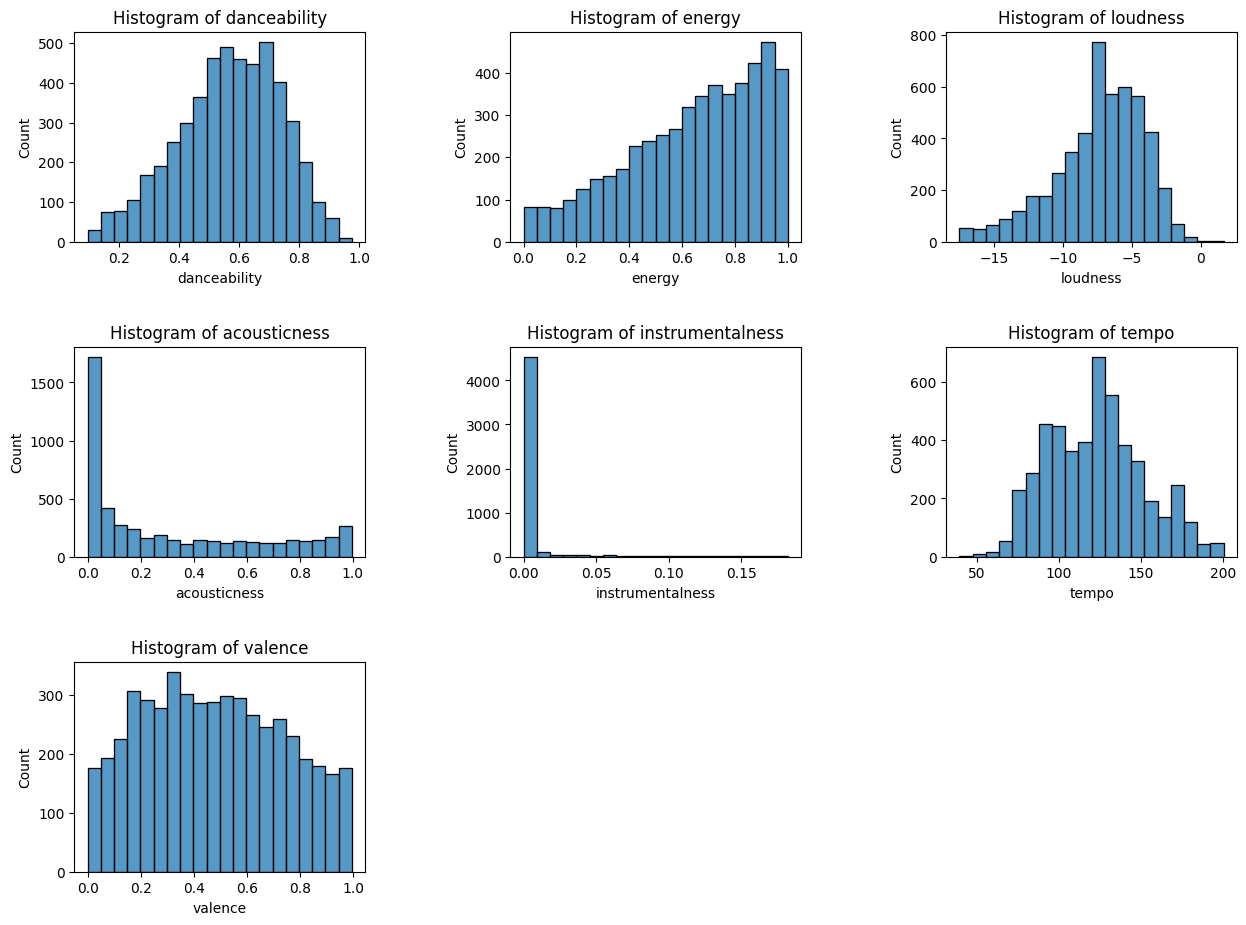

In [545]:
plt.figure(figsize=(15, 15))
n = 0
for x in ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'tempo', 'valence']:
    n += 1
    plt.subplot(4 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df_selected_features[x] , bins = 20)
    plt.title('Histogram of {}'.format(x))
plt.show()

In [546]:
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_selected_features)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [547]:
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
print(f"Untuk n_clusters = 4, rata-rata silhouette_score adalah: {silhouette_avg:.4f}")


kmeans = KMeans(n_clusters=4, random_state=42)
final_labels = kmeans.fit_predict(df_scaled)

Untuk n_clusters = 4, rata-rata silhouette_score adalah: 0.9322


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

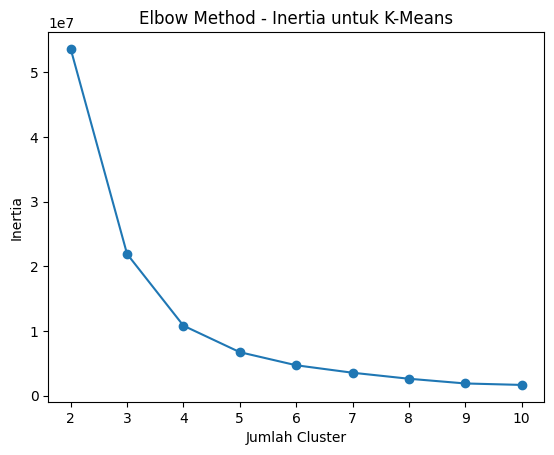

In [548]:
inertias = []
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=2023)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
plt.plot(range(2, 11), inertias, marker='o')
plt.title('Elbow Method - Inertia untuk K-Means')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [549]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

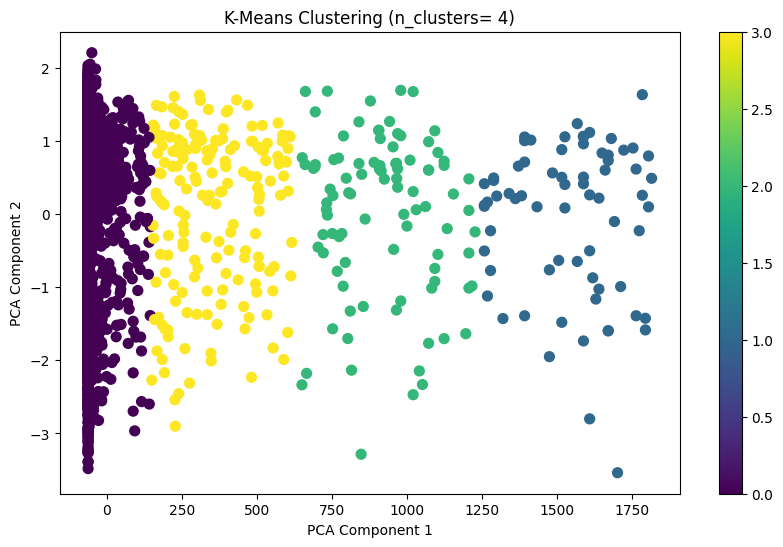

In [550]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=final_labels, cmap='viridis', s=50)
plt.colorbar(scatter)
plt.title(f"K-Means Clustering (n_clusters= 4)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [551]:
selected_features = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'tempo', 'valence']
df_normalized = pd.DataFrame(df_scaled, columns=selected_features)
df_normalized['Cluster'] = final_labels
print("DataFrame yang sudah distandarisasi dengan label cluster:")
print(df_normalized.head())


DataFrame yang sudah distandarisasi dengan label cluster:
   danceability    energy  loudness  acousticness  instrumentalness     tempo  \
0      0.121212 -0.600387 -0.373166      1.210552         -0.446968 -0.245537   
1      1.028213  0.445449  0.392290     -0.126761          5.746581 -0.288936   
2     -1.074190 -0.538412  0.249158      1.013914         -0.446968 -1.203520   
3     -0.300940 -0.331827 -0.036625      1.245666          5.457548  0.130979   
4      0.982236  0.370562  0.237852     -0.282105        540.456258 -0.545813   

    valence  Cluster  
0 -0.237762        0  
1  1.060606        0  
2 -0.372960        0  
3  0.298368        0  
4 -0.613054        3  


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [552]:
df_original_scaled = scaler.inverse_transform(df_scaled)

# Buat DataFrame baru dengan fitur asli dan tambahkan label cluster
df_original = pd.DataFrame(df_original_scaled, columns=selected_features)
df_original['Cluster'] = final_labels

# Tampilkan hasil
print("DataFrame dengan fitur asli dan label cluster:")
print(df_original.head())

DataFrame dengan fitur asli dan label cluster:
   danceability  energy  loudness  acousticness  instrumentalness    tempo  \
0         0.608   0.456    -8.576       0.85800          0.000000  112.127   
1         0.825   0.861    -5.394       0.09630          0.000600  110.376   
2         0.322   0.480    -5.989       0.74600          0.000000   73.476   
3         0.507   0.560    -7.177       0.87800          0.000572  127.318   
4         0.814   0.832    -6.036       0.00782          0.052400  100.012   

   valence  Cluster  
0    0.362        0  
1    0.919        0  
2    0.304        0  
3    0.592        0  
4    0.201        3  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [553]:
df['cluster'] = final_labels
cluster_summary = df.groupby('cluster')[selected_features].mean()
print("\nRata-rata fitur per cluster:")
print(cluster_summary)


Rata-rata fitur per cluster:
         danceability    energy  loudness  acousticness  instrumentalness  \
cluster                                                                     
0            0.568645  0.638000 -7.306113      0.319354          0.000659   
1            0.572211  0.700389 -7.708007      0.212869          0.155704   
2            0.568125  0.698107 -7.512833      0.233278          0.095093   
3            0.539565  0.696842 -7.560232      0.261681          0.040221   

              tempo   valence  
cluster                        
0        122.010918  0.477774  
1        130.389000  0.411654  
2        124.266219  0.444347  
3        126.084322  0.467311  


In [554]:
cluster_counts = df['cluster'].value_counts()
print("Jumlah data per cluster:")
print(cluster_counts)

Jumlah data per cluster:
cluster
0    4656
3     177
2      96
1      71
Name: count, dtype: int64


Tulis hasil interpretasinya di sini.
1. Cluster 0: Lagu-lagu yang cukup enak untuk menari, energi sedang, ada sentuhan akustik, tempo cepat (121 BPM), dan mood ceria tapi tidak terlalu berlebihan. Cocok untuk pop santai atau acara sosial.
2. Cluster 1: Lagu-lagu enerjik dan keras, cukup enak untuk menari, fokus pada vokal, tempo cepat (125 BPM), dan mood netral. Ideal untuk rock atau pop dinamis untuk olahraga.
3. Cluster 2: Lagu dengan energi tinggi, cukup danceable, vokal dominan, sedikit akustik, tempo cepat (124 BPM), dan mood netral. Cocok untuk pop rock atau rock alternatif yang enerjik.
4. Cluster 3: Lagu enerjik, cukup enak untuk menari, vokal sangat dominan, sedikit akustik, tempo cepat (124 BPM), dan mood lebih ceria. Bagus untuk pop ringan dan menghibur.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans pada dataset Spotify tracks.

## Cluster 0 (Ungu)
- **Rata-rata Danceability (0-1):** 0.567839  
- **Rata-rata Energy (0-1):** 0.637548  
- **Analisis:**  
  Cluster ini mencakup lagu dengan tingkat *danceability* dan *energy* menengah-tinggi. Lagu dalam cluster ini cenderung enerjik dan cukup enak untuk menari, dengan *mood* positif (valence 0.476382), cocok untuk genre pop yang populer dan menghibur, dengan karakteristik akustik sedang (acousticness 0.320299) dan elemen instrumental yang cukup (instrumentalness 0.164861).

## Cluster 1 (Kuning)
- **Rata-rata Danceability (0-1):** 0.550967  
- **Rata-rata Energy (0-1):** 0.706138  
- **Analisis:**  
  Cluster ini menunjukkan lagu dengan *danceability* menengah-tinggi dan *energy* sangat tinggi. Lagu di cluster ini merupakan kelompok musik yang sangat enerjik dan cepat (tempo 124.852031), dengan sedikit akustik (acousticness 0.220990) dan elemen instrumental yang minim (instrumentalness 0.097175), sesuai genre rock dengan *mood* netral/positif (valence 0.434290).

## Cluster 2 (Hijau)
- **Rata-rata Danceability (0-1):** 0.547982  
- **Rata-rata Energy (0-1):** 0.685939  
- **Analisis:**  
  Cluster ini terdiri dari lagu dengan *danceability* menengah-tinggi dan *energy* tinggi, tetapi tempo cepat (123.933709) dan elemen akustik/instrumental yang rendah (acousticness 0.253331, instrumentalness 0.053572). Lagu ini mungkin genre rock alternatif atau pop rock, dengan *mood* netral (valence 0.428689), menunjukkan karakter musik yang enerjik namun fokus pada vokal.

## Cluster 3 (Biru)
- **Rata-rata Danceability (0-1):** 0.555023  
- **Rata-rata Energy (0-1):** 0.683610  
- **Analisis:**  
  Cluster ini menunjukkan lagu dengan *danceability* menengah-tinggi dan *energy* tinggi, tempo cepat (123.663406), *mood* positif (valence 0.459299), dan elemen akustik/instrumental yang sangat rendah (acousticness 0.256222, instrumentalness 0.020982). Lagu ini cocok untuk genre pop ringan atau pop enerjik, dengan karakter musik yang menghibur, dinamis, dan fokus pada vokal.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [555]:
df_original.to_csv('Dataset_Clustering.csv', index=False)

print("DataFrame dengan fitur asli dan label cluster telah disimpan ke 'Dataset_Clustering.csv'")

DataFrame dengan fitur asli dan label cluster telah disimpan ke 'Dataset_Clustering.csv'
